In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel("/Users/Rescate123/Documents/DataAnalist/EBAC/Machine-Learning/default_of_credit_card_clients.xls", header=1, index_col=0)
df.sample(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
5791,100000,2,2,2,26,-1,-1,-1,-1,-1,...,390,390,380,0,390,390,390,380,400,0
11956,360000,1,1,2,36,0,0,-1,-1,-1,...,0,2030,2112,15000,493,0,2030,2112,750,0
28536,120000,2,3,2,32,-1,0,0,0,0,...,71446,79589,81354,2429,3120,3300,10000,3200,3200,0
26790,50000,1,3,2,29,1,-1,-1,-1,-1,...,0,1662,4537,1899,832,0,1662,4537,2943,0
7061,120000,2,2,1,37,0,0,0,2,0,...,14313,14762,14902,1171,1942,0,626,478,495,0
14979,480000,2,2,2,31,-1,-1,-1,-1,-1,...,1759,1759,1759,1759,1759,1759,1759,1759,1759,1
779,50000,2,1,1,32,2,0,0,-1,0,...,639,4639,2312,2500,3000,7000,4000,2413,2000,1
5550,50000,1,2,2,22,1,2,0,0,0,...,19773,19931,19237,1000,2000,900,900,1000,1000,0
14267,290000,2,2,1,37,0,0,0,0,0,...,198869,222558,134187,52000,40504,20000,30003,15004,4012,0


In [4]:
df.info() #la columna ID se esta tomando como index, no es necesario eliminarla

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_AMT4  

In [5]:
df.nunique() #no hay variables categoricas

LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [6]:
df.isnull().sum().sum() #no hay nulos

np.int64(0)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


<Axes: >

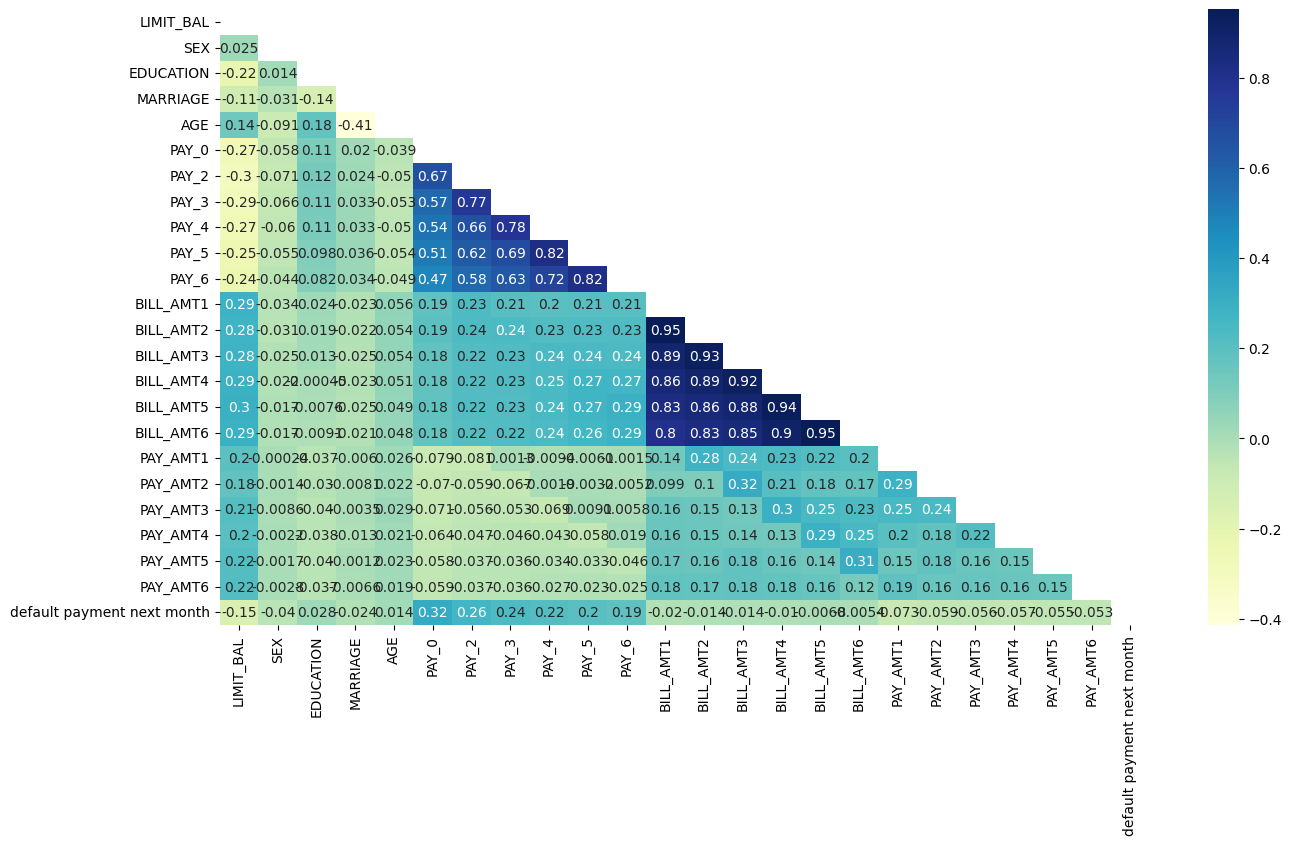

In [8]:
corr_matrix=df.corr()
mask=np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, mask=mask,  cmap='YlGnBu', annot=True)

In [9]:
#agrupacion de datos que no son relevantes para el modelo
df2=df.copy() #copia del dataframe original
df2['Bill_mean_prev']= df2[['BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)
df2['Bill_std_prev']= df2[['BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].std(axis=1)

df2['Pay_mean_prev']= df2[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3']].mean(axis=1)
df2['Pay_std_prev']= df2[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3']].std(axis=1)

In [10]:
#eliminamos columnas
df2.drop(columns=['BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3'], inplace=True)
df2.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'Bill_mean_prev', 'Bill_std_prev',
       'Pay_mean_prev', 'Pay_std_prev'],
      dtype='object')

array([[<Axes: title={'center': 'LIMIT_BAL'}>,
        <Axes: title={'center': 'SEX'}>,
        <Axes: title={'center': 'EDUCATION'}>,
        <Axes: title={'center': 'MARRIAGE'}>,
        <Axes: title={'center': 'AGE'}>],
       [<Axes: title={'center': 'PAY_0'}>,
        <Axes: title={'center': 'PAY_2'}>,
        <Axes: title={'center': 'PAY_3'}>,
        <Axes: title={'center': 'PAY_4'}>,
        <Axes: title={'center': 'PAY_5'}>],
       [<Axes: title={'center': 'PAY_6'}>,
        <Axes: title={'center': 'BILL_AMT1'}>,
        <Axes: title={'center': 'BILL_AMT2'}>,
        <Axes: title={'center': 'BILL_AMT3'}>,
        <Axes: title={'center': 'PAY_AMT4'}>],
       [<Axes: title={'center': 'PAY_AMT5'}>,
        <Axes: title={'center': 'PAY_AMT6'}>,
        <Axes: title={'center': 'default payment next month'}>,
        <Axes: title={'center': 'Bill_mean_prev'}>,
        <Axes: title={'center': 'Bill_std_prev'}>],
       [<Axes: title={'center': 'Pay_mean_prev'}>,
        <Axes: titl

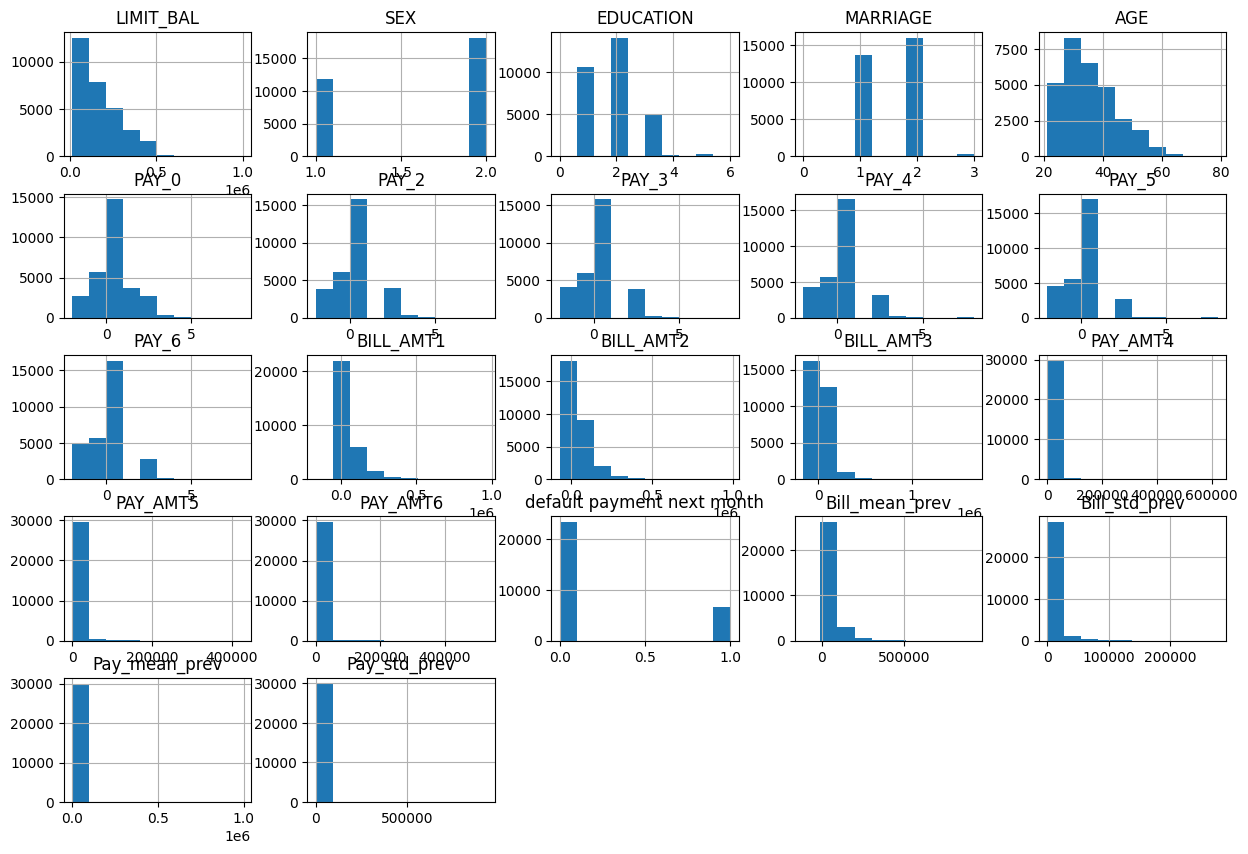

In [11]:
df2.hist(figsize=(15, 10))

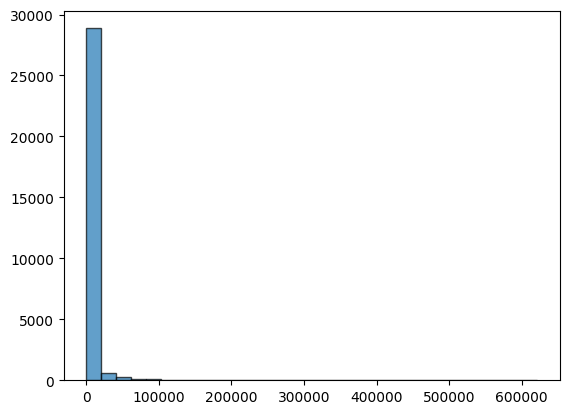

In [31]:
plt.hist(df2['PAY_AMT4'], bins=30, edgecolor='black', alpha=0.7)
plt.show()

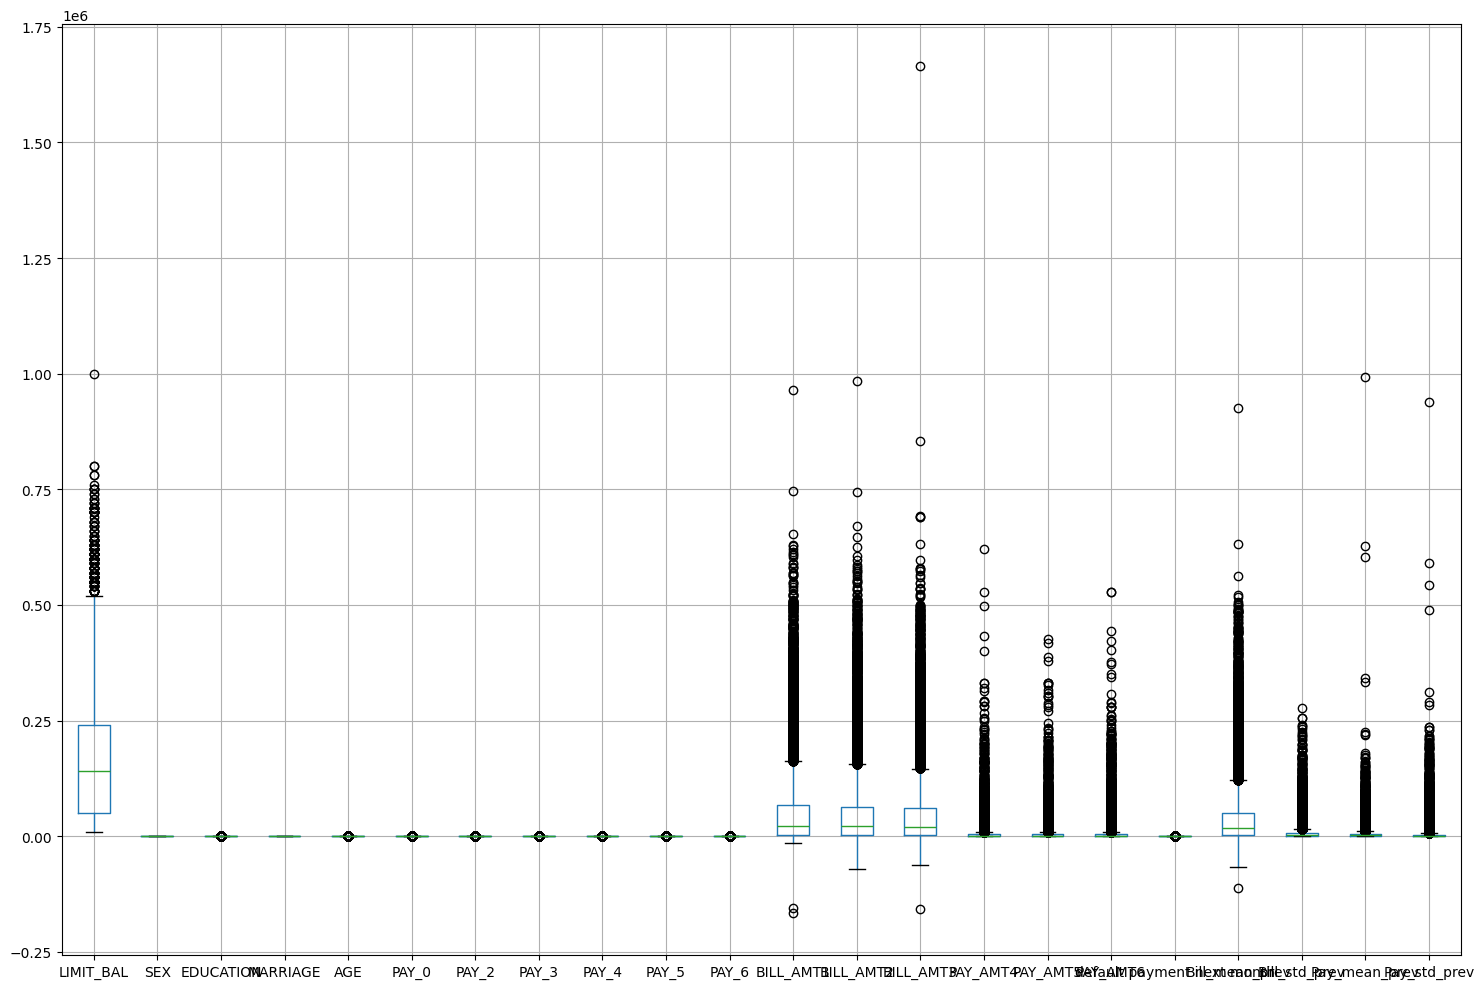

In [83]:
df2.boxplot(figsize=(15, 10))
plt.tight_layout()

Como casi todas las columnas tienen outliers y PAY_AMT4 tiene muchos ceros, vamos a aplicar un escalado robusto para usar un modelo de XGBoost

In [ ]:
#modelo para predecir pay_amt4
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
#seleccionamos las columnas que vamos a usar para el modelo
cols_predictors = ['LIMIT_BAL', 'AGE','SEX', 'EDUCATION', 'MARRIAGE', 'PAY_5', 'PAY_6',
                   'Bill_mean_prev', 'Bill_std_prev', 'Pay_mean_prev', 'Pay_std_prev']

x=df2[cols_predictors] #variables predictoras
y=df2['PAY_AMT4'] #variable objetivo

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)
scaler=RobustScaler() #escalado robusto para eliminar outliers

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
#modelo de prediccion
xgb=XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb.fit(x_train_scaled, y_train)
y_pred=xgb.predict(x_test_scaled)

mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
rmse=np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 87921296.0
R2 Score: 0.46294742822647095
Root Mean Squared Error: 9376.635643982334


In [84]:
#comparacion con modelo base (promedio)
from sklearn.dummy import DummyRegressor
dummy=DummyRegressor(strategy='mean')
dummy.fit(x_train, y_train)
y_dummy=dummy.predict(x_test)
mse_dummy=mean_squared_error(y_test, y_dummy)
rmse_dummy=np.sqrt(mse_dummy)

print(f'Dummy Mean Squared Error: {mse_dummy}') 
print(f'Dummy R2 Score: {r2_score(y_test, y_dummy)}')
print(f'Dummy Root Mean Squared Error: {rmse_dummy}')

Dummy Mean Squared Error: 163785780.7310968
Dummy R2 Score: -0.00045809156310183674
Dummy Root Mean Squared Error: 12797.88188455796


El resultado del modelo de xgboost es mejor que el modelo base, por lo que se acepta el modelo

In [ ]:
#visualizacion de residuos
coef_df2=pd.DataFrame({'Variable': cols_predictors, 'Coeficiente': xgb.feature_importances_})
print(coef_df2)

          Variable  Coeficiente
0        LIMIT_BAL     0.037002
1              AGE     0.036150
2              SEX     0.058518
3        EDUCATION     0.023806
4         MARRIAGE     0.078553
5            PAY_5     0.182574
6            PAY_6     0.234495
7   Bill_mean_prev     0.134396
8    Bill_std_prev     0.123446
9    Pay_mean_prev     0.051719
10    Pay_std_prev     0.039340


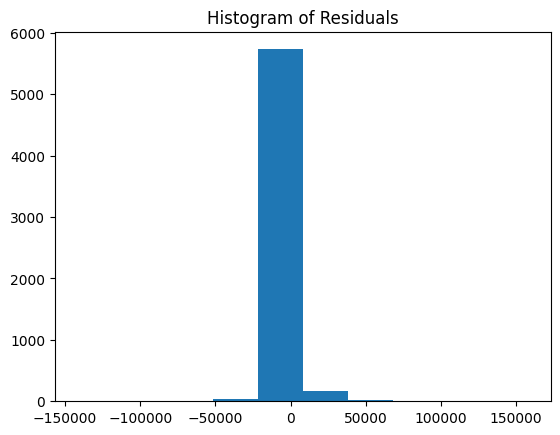

In [29]:
plt.hist(y_test - y_pred)
plt.title('Histogram of Residuals')
plt.show()

Prediccion de default payment next month 

In [ ]:
df['default payment next month'].value_counts() #clases desbalanceadas

default payment next month
0    23364
1     6636
Name: count, dtype: int64

In [ ]:
ratio= (df['default payment next month']==0).sum()/(df['default payment next month']==1).sum()
ratio #desbalance significativo, vamos a usar un modelo de clasificacion
#por cada persona que paga, hay 3.5 que no paga

np.float64(3.5207956600361663)

In [86]:
#modelo de clasificacion
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, f1_score, precision_score, recall_score 
import matplotlib.pyplot as plt
import seaborn as sns

cols_classification = ['LIMIT_BAL', 'AGE','SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0','PAY_2', 'PAY_3',
                   'PAY_4','PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                   'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

x_cls=df[cols_classification] #variables predictoras
y_cls=df['default payment next month'] #variable objetivo

x_train_cls, x_test_cls, y_train_cls, y_test_cls=train_test_split(x_cls, y_cls, test_size=0.2, random_state=42)
scaler_cls=RobustScaler() #escalado robusto para eliminar outliers

x_train_cls_scaled = scaler_cls.fit_transform(x_train_cls)
x_test_cls_scaled = scaler_cls.transform(x_test_cls)
#modelo de prediccion
xgb_cls=XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, scale_pos_weight=ratio, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_cls.fit(x_train_cls_scaled, y_train_cls)
#evaluamos el modelo
y_prob_cls=xgb_cls.predict_proba(x_test_cls_scaled)[:, 1]
threshold = 0.4 #menor a .5 para aumentar el recall
y_pred_cls = (y_prob_cls >= threshold).astype(int)

C:\Users\Rescate123\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [15:49:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [87]:
#evaluacion del modelo
model_score= accuracy_score(y_test_cls, y_pred_cls)
recall_score= recall_score(y_test_cls, y_pred_cls)
precision_score= precision_score(y_test_cls, y_pred_cls)
f1_score= f1_score(y_test_cls, y_pred_cls)

print('Medidas del modelo')
print('----------------------')
print('Acurracy = {0:0.2f}'.format(model_score)) #num de prediciones correctas
print('Recall= {0:0.2f}'.format(recall_score))  #proporcion de predicciones positivas reales correctas
print('Precision= {0:0.2f}'.format(precision_score)) #proporcion de predicciones positivas correctas
print('F1= {0:0.2f}'.format(f1_score)) #media armonica de recall y presicion
print('Roc auc score= {0:0.2f}'.format(roc_auc_score(y_test_cls, y_prob_cls)))

Medidas del modelo
----------------------
Acurracy = 0.68
Recall= 0.74
Precision= 0.38
F1= 0.50
Roc auc score= 0.78


El modelo acierta 69% de los casos, acerto en el 74% de los que no pagaron pero solo el 38% de los que dijo que no pagarian realmente no pagaron. Si el objetivo es detectar a los clientes que no pagaran, entonces el modelo es bueno (incluso podria usarse un threshold menor).
En general el modelo es bueno ya que tiene un 78% del roc auc score (buen potencial de clasificacion).

Text(0.5, 1.0, 'Matriz de confusion')

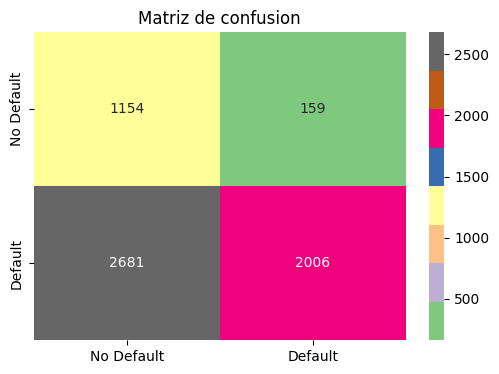

In [80]:
#Matriz de confusion
cm=confusion_matrix(y_test_cls, y_pred_cls, labels=[1,0])
cm_df=pd.DataFrame(cm, index=[i for i in ['No Default','Default']], columns=[i for i in ['No Default','Default']])
plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, cmap='Accent', fmt='d').set_title('Matriz de confusion')

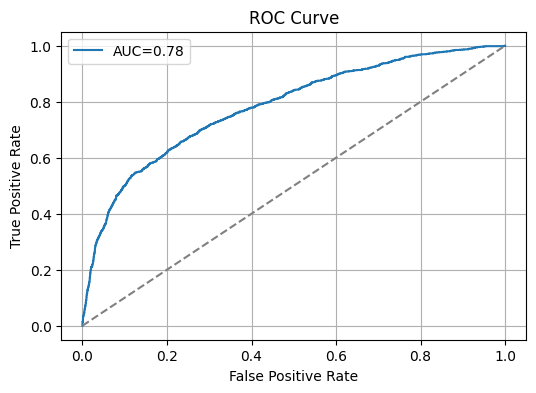

In [91]:
#plt.style.use('seaborn-whitegrid')
fpr, tpr, threshold= roc_curve(y_test_cls, y_prob_cls)
auc=roc_auc_score(y_test_cls, y_prob_cls)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC={auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [81]:
#CURVA DE PRECISION-RECALL
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_test_cls, y_prob_cls)
f1_score = 2 * (precision * recall) / (precision + recall+1e-6) #evita division entre 0

best_idx=np.argmax(f1_score) #usando el mejor f1
best_threshold = threshold[best_idx]
best_f1=f1_score[best_idx]
print(f'Best F1 Score: {best_f1:.2f} en el umbral {best_threshold:.2f}')

Best F1 Score: 0.55 en el umbral 0.61


¿El modelo seria mejor con el threshold de 0.61?
Depende de la estrategia de negocio: con este modelo se podria decir que muchos clientes pagaran y en realidad no lo hacen pero se tendria mas acierto con los que si lo hacen

In [82]:
y_pred_best= (y_prob_cls >= best_threshold).astype(int)
print(classification_report(y_test_cls, y_pred_best))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      4687
           1       0.56      0.54      0.55      1313

    accuracy                           0.81      6000
   macro avg       0.72      0.71      0.71      6000
weighted avg       0.80      0.81      0.81      6000

